## Bone Marrow Transplant in Children 
### - Practical Applications in Machine Learning Project - 2023 
### - Preprocessing Step:

In [1]:
# Import necessary libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## 1. Dataset Upload

In [2]:
file_location = ("/Users/johnmorris/Desktop/Comp_Bio_MS_Weill_Cornell/Spring_2023/PAML/Final_Project/Bone Marrow/bone-marrow.csv")

df = pd.read_csv(file_location)
df

,Recipientgender,Stemcellsource,Donorage,Donorage35,IIIV,Gendermatch,DonorABO,RecipientABO,RecipientRh,ABOmatch,...,extcGvHD,CD34kgx10d6,CD3dCD34,CD3dkgx10d8,Rbodymass,ANCrecovery,PLTrecovery,time_to_aGvHD_III_IV,survival_time,survival_status
0,1,1,22.830137,0,1,0,1,1.0,1.0,0.0,...,1.0,7.20,1.338760,5.38,35.0,19.0,51.0,32.0,999.0,0.0
1,1,0,23.342466,0,1,0,-1,-1.0,1.0,0.0,...,1.0,4.50,11.078295,0.41,20.6,16.0,37.0,1000000.0,163.0,1.0
2,1,0,26.394521,0,1,0,-1,-1.0,1.0,0.0,...,1.0,7.94,19.013230,0.42,23.4,23.0,20.0,1000000.0,435.0,1.0
3,0,0,39.684932,1,1,0,1,2.0,1.0,1.0,...,NaN,4.25,29.481647,0.14,50.0,23.0,29.0,19.0,53.0,1.0
4,0,1,33.358904,0,0,0,1,2.0,0.0,1.0,...,1.0,51.85,3.972255,13.05,9.0,14.0,14.0,1000000.0,2043.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,1,1,0,1,1.0,0.0,0.0,...,1.0,11.08,2.522750,4.39,44.0,15.0,22.0,16.0,385.0,1.0
183,0,1,22.895890,0,0,0,1,0.0,1.0,1.0,...,1.0,4.64,1.038858,4.47,44.5,12.0,30.0,1000000.0,634.0,1.0
184,0,1,27.347945,0,1,0,1,-1.0,1.0,1.0,...,1.0,7.73,1.635559,4.73,33.0,16.0,16.0,1000000.0,1895.0,0.0
185,1,1,27.780822,0,1,0,1,0.0,1.0,1.0,...,0.0,15.41,8.077770,1.91,24.0,13.0,14.0,54.0,382.0,1.0


## 2. Feature/Attribute Descriptions

The set contains 187 examples characterized by 37 attributes. 

The descriptions of the following features and their pre- or post-operative categorization is as follows:

Pre-operative Features:

    Recipientgender - Male - 1, Female - 0
    
    Stemcellsource - Source of hematopoietic stem cells (Peripheral blood - 1, Bone marrow - 0)
    
    Donorage - Age of the donor at the time of hematopoietic stem cells apheresis
    
    Donorage35 - Donor age <35 - 0, Donor age >=35 - 1
    
    Gendermatch - Compatibility of the donor and recipient according to their gender (Female to Male - 1, Other - 0)
    
    DonorABO - ABO blood group of the donor of hematopoietic stem cells (0 - 0, 1, A, B=-1, AB=2)
    
    RecipientABO - ABO blood group of the recipient of hematopoietic stem cells (0 - 0, 1, A, B=-1, AB=2)
    
    RecipientRh - Presence of the Rh factor on recipients red blood cells ('+' - 1, '-' - 0)
    
    ABOMatch - Compatibility of the donor and the recipient of hematopoietic stem cells according to ABO blood group (matched - 1, mismatched - 1)
    
    CMVstatus - Serological compatibility of the donor and the recipient of hematopoietic stem cells according to cytomegalovirus infection prior to transplantation (the higher the value the lower the compatibility)
    
    RecipientCMV - Presence of cytomegalovirus infection in the donor of hematopoietic stem cells prior to transplantation (presence - 1, absence - 0)
    
    Disease - Type of disease (ALL, AML, chronic, nonmalignant, lymphoma)
    
    Riskgroup - High risk - 1, Low risk - 0
    
    Diseasegroup - Type of disease (malignant - 1, nonmalignant - 0)
    
    HLAmatch - Compatibility of antigens of the main histocompatibility complex of the donor and the recipient of hematopoietic stem cells according to ALL international BFM SCT 2008 criteria (10/10 - 0, 9/10 - 1, 8/10 - 2, 7/10 - 3 (allele/antigens))
    
    HLAmismatch - HLA matched - 0, HLA mismatched - 1
    
    Antigen - In how many antigens there is difference between the donor andd the recipient (-1 - no differences, 0 - one difference, 1 - two differences, 2 - three differences)
    
    Allel - In how many allele there is difference between the donor and the recipient {-1 no differences, 0 - one difference, 1 - two differences, 2 - three differences, 3 - four differences)
    
    HLAgrI - The difference type between the donor and the recipient (HLA matched - 0, the difference is in only one antigen - 1, the difference is only in one allele - 2, the difference is only in DRB1 cell - 3, two differences (two allele or two antigens) - 4, two differences (two allele or two antigens) - 5)
    
    Recipientage - Age of the recipient of hematopoietic stem cells at the time of transplantation
    
    Recipientage10 - Recipient age <10 - 0, Recipient age>=10 - 1
    
    Recipientageint - Recipient age in (0,5] - 0, (5, 10] - 1, (10, 20] - 2
    
    
    Rbodymass - Body mass of the recipient of hematopoietic stem cells at the time of transplantation
    
Post-operative features:

    Txpostrelapse - The second bone marrow transplantation after relapse (No - 0; Yes - 1)

    Relapse - Reoccurrence of the disease (No - 0, Yes - 1)

    IIIV - Development of acute graft versus host disease stage II or III or IV (Yes - 1, No - 0)
    
    aGvHDIIIIV - Development of acute graft versus host disease stage III or IV (Yes - 0, No - 1)
    
    extcGvHD - Development of extensive chronic graft versus host disease (Yes - 0, No - 1)
    
    CD34kgx10d6 - CD34+ cell dose per kg of recipient body weight (10^6/kg)
    
    CD3dCD34 - CD3+ cell to CD34+ cell ratio
    
    CD3dkgx10d8 - CD3+ cell dose per kg of recipient body weight (10^8/kg)
    
    ANCrecovery - Time to neutrophils recovery defined as neutrophils count >0.5 x 10^9/L 
    
    PLTrecovery - Time to platelet recovery defined as platelet count >50000/mm3
    
    time_to_aGvHD_III_IV - Time to development of acute graft versus host disease stage III or IV
    
    survival_time - numeric
    
Predicted Value:
    
    survival_status

## 3. Dropping Certain Categories to select for only pre-operative features

Our model is being used to help predict the survival status of bone marrow transplant recipients by only using pre-operative metrics and features. 

Therefore, we drop all of the post-operative measures, which include "IIIV", "aGvHDIIIIV", "extcGvHD", "CD34kgx10d6", "CD3dCD34", "CD3dkgx10d8", "ANCrecovery", "PLTrecovery", "time_to_aGvHD_III_IV", "Relapse", "Txpostrelapse" and "survival_time"

We've also chose to not include "Donorage35", "DonorABO", "RecipientABO", "Recipientage10", "Recipientageint" and "HLAgrI". This is because the above features are redundant, and are already covered by the ABO Match, Donor age, Recipient age and HLA match features

In [3]:
# Dropping the 12 post-operative measures
df = df.drop(columns=["IIIV", "aGvHDIIIIV", "extcGvHD", "CD34kgx10d6", "CD3dCD34", "CD3dkgx10d8", "ANCrecovery", "PLTrecovery", "time_to_aGvHD_III_IV", "Relapse", "Txpostrelapse", "survival_time"])

# Dropping 6 reptitive categories
df = df.drop(columns=["Donorage35", "DonorABO", "RecipientABO", "Recipientage10", "Recipientageint", "HLAgrI"])

# Total columns dropped = ["Donorage35", "IIIV", "DonorABO", "RecipientABO", "Recipientage10", "Recipientageint", "aGvHDIIIIV", "extcGvHD", "CD34kgx10d6", "CD3dCD34", "CD3dkgx10d8", "ANCrecovery", "PLTrecovery", "time_to_aGvHD_III_IV", "survival_time", "Relapse", "Txpostrelapse", "HLAgrI"]

df


,Recipientgender,Stemcellsource,Donorage,Gendermatch,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Disease,Riskgroup,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,Recipientage,Rbodymass,survival_status
0,1,1,22.830137,0,1.0,0.0,3.0,1.0,1.0,ALL,1,1,0,0,-1.0,-1.0,9.6,35.0,0.0
1,1,0,23.342466,0,1.0,0.0,0.0,0.0,0.0,ALL,0,1,0,0,-1.0,-1.0,4.0,20.6,1.0
2,1,0,26.394521,0,1.0,0.0,2.0,0.0,1.0,ALL,0,1,0,0,-1.0,-1.0,6.6,23.4,1.0
3,0,0,39.684932,0,1.0,1.0,1.0,1.0,0.0,AML,0,1,0,0,-1.0,-1.0,18.1,50.0,1.0
4,0,1,33.358904,0,0.0,1.0,0.0,0.0,1.0,chronic,1,1,1,0,1.0,0.0,1.3,9.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
182,1,1,37.575342,0,0.0,0.0,3.0,1.0,1.0,lymphoma,1,1,0,0,-1.0,-1.0,12.9,44.0,1.0
183,0,1,22.895890,0,1.0,1.0,2.0,0.0,1.0,AML,1,1,0,0,-1.0,-1.0,13.9,44.5,1.0
184,0,1,27.347945,0,1.0,1.0,3.0,1.0,1.0,nonmalignant,0,0,0,0,-1.0,-1.0,10.4,33.0,0.0
185,1,1,27.780822,0,1.0,1.0,0.0,0.0,0.0,chronic,0,1,1,0,1.0,0.0,8.0,24.0,1.0


## 4. Checking the correlation of certain values

In [23]:
corr_donor = df['Donorage'].corr(df['survival_status'])
corr_ABO = df['ABOmatch'].corr(df['survival_status'])
corr_bodymass = df['Rbodymass'].corr(df['survival_status'])
corr_HLA = df['HLAmatch'].corr(df['survival_status'])
corr_CMV = df['RecipientCMV'].corr(df['survival_status'])

print("The correlation coefficient between Donor age and survival status is: {}".format(corr_donor))
print("The correlation coefficient between ABO match and survival status is: {}".format(corr_ABO))
print("The correlation coefficient between Recipient body mass and survival status is: {}".format(corr_bodymass))
print("The correlation coefficient between HLA match and survival status is: {}".format(corr_HLA))
print("The correlation coefficient between Recipient CMV status and survival status is: {}".format(corr_CMV))


corr_match = df['HLAmatch'].corr(df['ABOmatch'])
corr_mass_age = df['Rbodymass'].corr(df['Recipientage'])

print("The correlation coefficient between HLA match and ABO match is: {}".format(corr_match))
print("The correlation coefficient between Recipient body mass and recipient age is: {}".format(corr_mass_age))


The correlation coefficient between Donor age and survival status is: 0.04767954855178703
The correlation coefficient between ABO match and survival status is: -0.10288147596794002
The correlation coefficient between Recipient body mass and survival status is: 0.22193460370160095
The correlation coefficient between HLA match and survival status is: 0.004342773684344251
The correlation coefficient between Recipient CMV status and survival status is: 0.03939666306837471
The correlation coefficient between HLA match and ABO match is: 0.13687856840517573
The correlation coefficient between Recipient body mass and recipient age is: 0.8993403844985876


Here, you can see the correlations of many variables with what will be our predicted output, survival status.
Also we check a few other correlations to see if they make sense. Recipient body mass and age correlate very well, which makes sense!

However, after checking many correlations, we didn't find any features that should be added or removed (besides those redundant features that we removed previously).

## 5. Creating figures for the distribution of each feature

<function matplotlib.pyplot.show(close=None, block=None)>

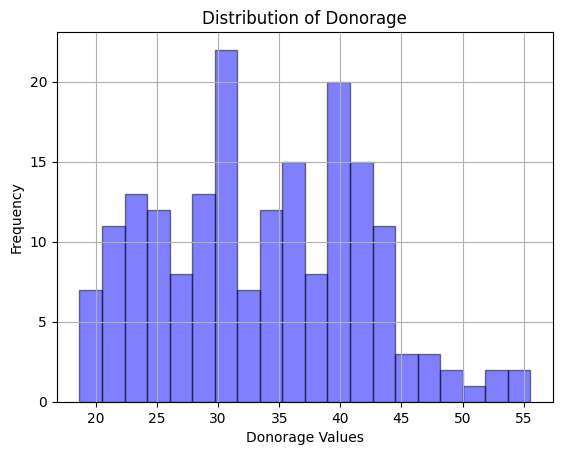

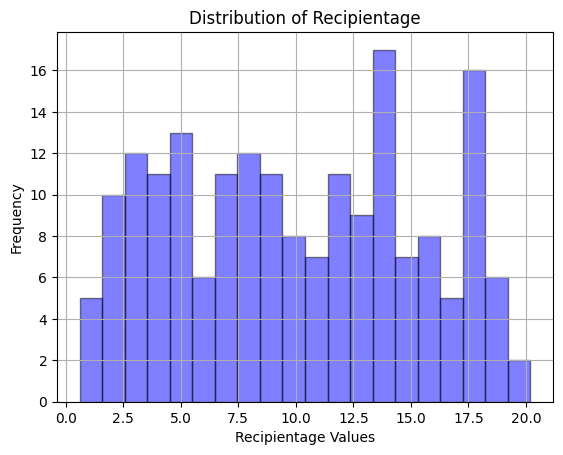

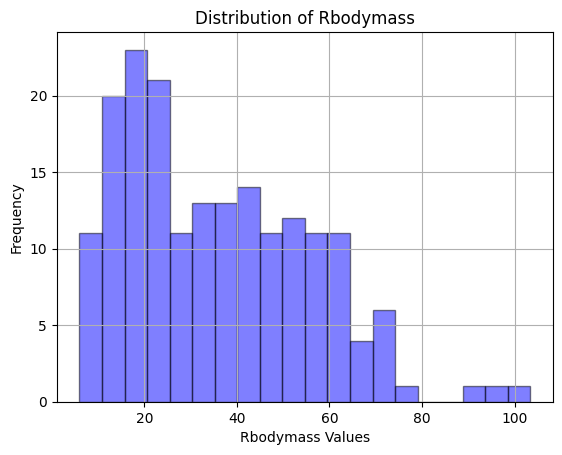

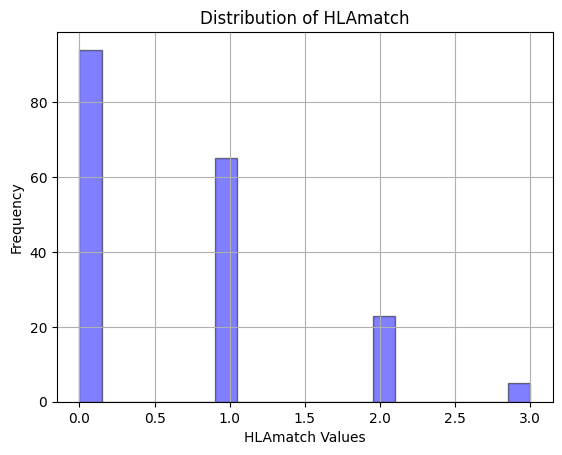

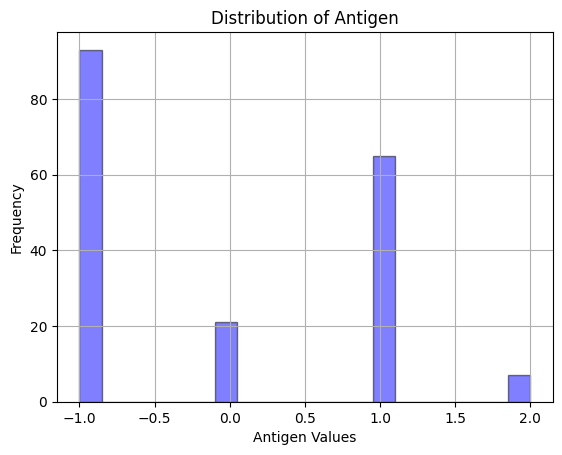

In [5]:
numerical_features= ['Donorage', 'Recipientage', 'Rbodymass', 'HLAmatch', 'Antigen']

for i, feat in enumerate(numerical_features):
    plt.figure()
    plt.hist(df[feat], bins=20, alpha=0.5, color='blue', edgecolor='black')
    plt.title("Distribution of {}".format(feat))
    plt.xlabel("{} Values".format(feat))
    plt.ylabel("Frequency")
    plt.grid(True)
    
plt.show
    
    # Can also compute what percent each value is at using the below:
    #counts = df[i].value_counts()
    #percentages = df[i].value_counts(normalize=True) * 100
    #print(i)
    #print(percentages)

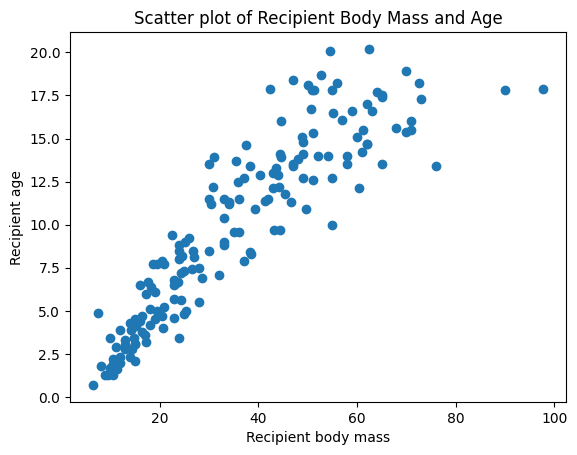

In [24]:
plt.scatter(df['Rbodymass'], df['Recipientage'])

# add axis labels and a title
plt.xlabel('Recipient body mass')
plt.ylabel('Recipient age')
plt.title('Scatter plot of Recipient Body Mass and Age')

# show the plot
plt.show()

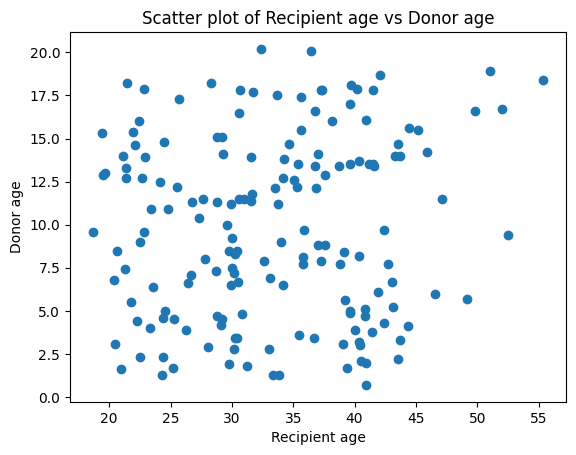

In [28]:
plt.scatter(df['Donorage'], df['Recipientage'])

# add axis labels and a title
plt.xlabel('Recipient age')
plt.ylabel('Donor age')
plt.title('Scatter plot of Recipient age vs Donor age')

# show the plot
plt.show()

## 6. Dropping NAs and Imputing the Data

In [6]:
# Check the rows with NA

missing_rows = df[df.isna().any(axis=1)]
missing_rows

,Recipientgender,Stemcellsource,Donorage,Gendermatch,RecipientRh,ABOmatch,CMVstatus,DonorCMV,RecipientCMV,Disease,Riskgroup,Diseasegroup,HLAmatch,HLAmismatch,Antigen,Alel,Recipientage,Rbodymass,survival_status
5,1,0,27.391781,0,1.0,1.0,NaN,NaN,1.0,chronic,1,1,0,0,-1.0,-1.0,8.9,40.0,0.0
6,0,1,34.520548,0,0.0,1.0,NaN,0.0,NaN,AML,0,1,0,0,-1.0,-1.0,14.4,51.0,1.0
18,0,1,43.375342,0,1.0,1.0,NaN,0.0,NaN,ALL,0,1,0,0,-1.0,-1.0,0.6,6.0,0.0
27,1,1,39.983562,0,1.0,1.0,NaN,0.0,NaN,ALL,0,1,3,1,1.0,2.0,4.7,17.0,1.0
30,0,1,24.731507,0,1.0,1.0,NaN,0.0,NaN,ALL,0,1,1,0,1.0,0.0,8.6,20.0,0.0
43,1,0,20.358904,0,1.0,1.0,NaN,1.0,NaN,nonmalignant,0,0,0,0,-1.0,-1.0,9.9,29.0,1.0
75,1,0,42.268493,1,1.0,1.0,NaN,0.0,NaN,AML,0,1,1,0,1.0,0.0,17.8,56.5,1.0
92,0,1,30.835616,0,1.0,0.0,0.0,0.0,0.0,ALL,0,1,1,0,1.0,0.0,5.0,NaN,1.0
93,0,1,22.408219,0,0.0,1.0,NaN,1.0,NaN,nonmalignant,0,0,0,0,-1.0,-1.0,7.6,34.0,1.0
102,0,1,40.183562,0,1.0,0.0,2.0,0.0,1.0,ALL,1,1,1,0,1.0,0.0,18.3,NaN,1.0


In [7]:
# This drops all the NA rows

df = df.dropna()

As you can see from the missing_rows dataframe, a majority of the NaN values are coming from the CMVstatus feature columns. Therefore, another option would have been to drop the CMV status from all individuals. However, we believe there will be a strong correlation of CMV status and survival status based on biological context, so we wanted to make sure to include this feature. Due to this, we dropped all of the rows with the NAs instead of altering columns. 

Since this is defined information, supposedly from patients, we decided not to impute. Also, since most columns are integer encoded, we decided using mean/median imputation would not be ideal.

In [8]:
# This drops the additional CMVstatus, therefore allowing us to keep 17 individuals/rows

#df = df.drop(columns=["CMVstatus", "RecipientCMV"], axis=1)

## 7. Checking for outliers

In this dataset, we did not find many significant outliers. However, we used the below to check for them. We only checked for significant outliers within Donor age, Recipient age and Rbodymass. These columns are numerical values and are not integer encoded. The integer encoded features were left out, as these have bins previously set for them that they are within.

In [9]:
# Include all columns except the categorical Disease column
cols_numerical = ['Donorage', 'Recipientage', 'Rbodymass']
print(cols_numerical)

['Donorage', 'Recipientage', 'Rbodymass']


In [15]:
# Checking for outliers within these columns
for i in cols_numerical:
    p20, p80 = np.percentile(df[i], [20, 80])
    iqr = p80 - p20

    # Calculate outlier bounds
    lower_bound = p20 - 1.5*iqr
    upper_bound = p80 + 1.5*iqr

    # Find any outliers
    outliers = df[i][(df[i] < lower_bound) | (df[i] > upper_bound)]
    print(i)
    print(outliers)
    
# As you can see, there are no outliers found.

Donorage
Series([], Name: Donorage, dtype: float64)
Recipientage
Series([], Name: Recipientage, dtype: float64)
Rbodymass
Series([], Name: Rbodymass, dtype: float64)


## 8. One Hot Encoding for Features with multiple possibilities

One hot encoding is typically used when the categories of a variable are nominal (i.e., there is no intrinsic ordering), and integer encoding is typically used when the categories of a variable are ordinal (i.e., there is an intrinsic ordering). One hot encoding allows the model to learn non-linear relationships between the categories, while integer encoding assumes a linear relationship between the categories. Additionally, one hot encoding can result in a larger number of features, which can lead to issues with overfitting.

In [16]:
for col in df.columns:
    unique_values = df[col].nunique()
    if unique_values > 2:
        print(f"{col}: {unique_values} unique values")

Donorage: 167 unique values
CMVstatus: 4 unique values
Disease: 5 unique values
HLAmatch: 4 unique values
Antigen: 4 unique values
Alel: 5 unique values
Recipientage: 114 unique values
Rbodymass: 120 unique values


Here, we can visualize which features have more than two options. From this, we can determine which are already integer encoded (and have intrinsic value), which features need standardization and which features are categorical.

For our process, we decided to use one-hot encoding for the single categorical value we have (Disease). Integer encoding assumes the categories have intrinsic ordering, which most of our already integer encoded features (like HLAmatch, CMVstatus, Antigen and Allel) have. We did not want the Diseases to be given an unbalanced representation if the integers are assigned arbitrarily. Due to this inconsistent representation, we decided it would be best to one-hot encode our "Disease" categorical value. 

In [17]:
# One hot encoding this certain features

df = pd.get_dummies(df, columns = ["Disease"])

In [18]:
df.columns

Index(['Recipientgender', 'Stemcellsource', 'Donorage', 'Gendermatch',
       'RecipientRh', 'ABOmatch', 'CMVstatus', 'DonorCMV', 'RecipientCMV',
       'Riskgroup', 'Diseasegroup', 'HLAmatch', 'HLAmismatch', 'Antigen',
       'Alel', 'Recipientage', 'Rbodymass', 'survival_status', 'Disease_ALL',
       'Disease_AML', 'Disease_chronic', 'Disease_lymphoma',
       'Disease_nonmalignant'],
      dtype='object')

## 9. Standardization of the numerical data using StandardScaler

The remaining 3 numerical features, which are not the already integer encoded with intrinsic ordering features, we will standardize. These features include 'Donorage', 'Recipientage', and 'Rbodymass'.

We chose to standardize the data due to the interpretability of the inputs and outputs when we deploy the model.

Since we did not observe outliers, we decided to standardize the data, rather than normalize. However, this standardization could also lead to bias since these numerical attributes are not normally distributed, as shown previously.

If the user inputs data above the maximum or below the minimum of the dataset, the normalization would cause the input to be above 1.0 or below 0.0, therefore affecting the interpretability and the model output. By using standardization, we can understand how many standard deviations the input value is from the mean of the dataset for that value and therefore accurately assess the model. This is another reason we decided to proceed with standardization.

In [19]:
# Columns to standardize:
# Donor age, Recipient age, Rbodymass

# We don't want to standardize: HLAmatch, CMV_status, Antigen, and Allele since these
# are already integer encoded properly

In [ ]:
# Create a StandardScaler object
scaler = StandardScaler()

# Select the columns to standardize
cols_to_standardize = ['Donorage', 'Recipientage', 'Rbodymass']

# Normalize the selected columns
df[cols_to_standardize] = scaler.fit_transform(df[cols_to_standardize])

# Print the normalized dataframe
df

In [ ]:
# Here is an example of how once we have deployed the model and ask the user for inputs, 
# we can transform these values to our scaled values

new_value = np.array([[40]])

# Transform the new value using the same scaler object used to scale the original dataset
transformed_value = (new_value - scaler.mean_[0]) / scaler.scale_[0]

print(transformed_value)

In [ ]:
# Therefore, here we show the means and the standard deviations used in the scaler and the above calculation as so:

print("The mean used by the scaler for the Donor age is: {}".format(scaler.mean_[0]))
print("The stdev used by the scaler for the Donor age is: {}".format(scaler.scale_[0]))

print("The mean used by the scaler for the Recipient age is: {}".format(scaler.mean_[1]))
print("The stdev used by the scaler for the Recipient age is: {}".format(scaler.scale_[1]))

print("The mean used by the scaler for the Rbodymass is: {}".format(scaler.mean_[2]))
print("The stdev used by the scaler for the Rbodymass is: {}".format(scaler.scale_[2]))

## 9. Export CSV

In [ ]:
#df.to_csv('BMT_cleaned_data.csv', index=False)